# Import libraries

In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error, r2_score

# Data Preparation

In [32]:
# Get the Boston housing price dataset from Github
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv

--2022-07-17 13:35:30--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37658 (37K) [text/plain]
Saving to: ‘Boston.csv.1’

Boston.csv.1        100%[===================>]  36.78K  --.-KB/s    in 0s      

2022-07-17 13:35:30 (112 MB/s) - ‘Boston.csv.1’ saved [37658/37658]



In [33]:
# Read the csv file with renamed columns
col_names = ['Crime Rate', 'Residential Land Zones', 'Non-retail Business Acres',
                'Charles River tract bounds', 'N.O. Concentration', '# of Rooms', 'Age',
                'Distance to Employment', 'Highway Accessibility', 'Property Tax Rate',
                'Pupil Teacher Ratio', 'B', '% Lower Income', 'Median Home Value']

boston_df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv', header=0, index_col=0, names=col_names)
boston_df.head()

,Crime Rate,Residential Land Zones,Non-retail Business Acres,Charles River tract bounds,N.O. Concentration,# of Rooms,Age,Distance to Employment,Highway Accessibility,Property Tax Rate,Pupil Teacher Ratio,B,% Lower Income,Median Home Value
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
# Explore the dataset
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crime Rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
Residential Land Zones,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
Non-retail Business Acres,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
Charles River tract bounds,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
N.O. Concentration,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
# of Rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
Age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Distance to Employment,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
Highway Accessibility,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
Property Tax Rate,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


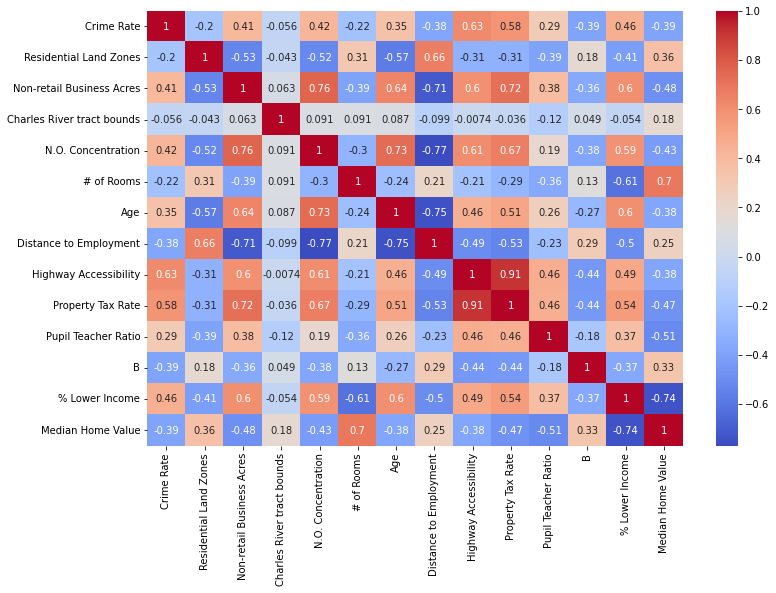

In [35]:
# Show correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(boston_df.corr(), linecolor='white', cmap='coolwarm', annot=True);

In [36]:
# Check for null values
boston_df.isnull().sum()

Crime Rate                    0
Residential Land Zones        0
Non-retail Business Acres     0
Charles River tract bounds    0
N.O. Concentration            0
# of Rooms                    0
Age                           0
Distance to Employment        0
Highway Accessibility         0
Property Tax Rate             0
Pupil Teacher Ratio           0
B                             0
% Lower Income                0
Median Home Value             0
dtype: int64

In [37]:
# Get features (X) and target(Y)
X = boston_df.drop(["B","Median Home Value"],axis=1).values
y = boston_df["Median Home Value"].values

X.shape, y.shape

((506, 12), (506,))

In [38]:
# Creating train and val set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((303, 12), (101, 12), (102, 12), (303,), (101,), (102,))

In [39]:
# Re-scaling our train and test set
scaler = MinMaxScaler()
scaler.fit(X_train)
# Transform training and test data with normalization (MinMaxScaler)
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [40]:
# Function for plotting MAE and loss curves
# Plot loss and metric curves of train and val set
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['mae']
  val_accuracy = history.history['val_mae']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_mae')
  plt.plot(epochs, val_accuracy, label='val_mae')
  plt.title('MAE')
  plt.xlabel('Epochs')
  plt.legend();

# Linear Regression

In [41]:
# Set random seed
tf.random.set_seed(42)

# Creating Linear Regression using TF FunctionalAPI
inputs = Input(shape=(12,))
output = Dense(1)(inputs)
linear_reg_model = Model(inputs, output)

In [42]:
linear_reg_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
linear_reg_model.compile(loss=tf.keras.losses.mse,
                       optimizer=tf.keras.optimizers.SGD(lr=0.01),
                       metrics='mae')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [44]:
# Fit the model
history_1 = linear_reg_model.fit(X_train_normalized, y_train, epochs=1000, validation_data=(X_val_normalized, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/1000
10/10 [==============================] - 0s 19ms/step - loss: 439.9617 - mae: 18.3415 - val_loss: 273.5740 - val_mae: 13.9003
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 226.7953 - mae: 11.8575 - val_loss: 167.4834 - val_mae: 10.2228
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 156.9897 - mae: 9.6176 - val_loss: 131.9297 - val_mae: 8.8424
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 130.9607 - mae: 8.7089 - val_loss: 115.2545 - val_mae: 8.2392
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 118.1091 - mae: 8.2354 - val_loss: 106.5560 - val_mae: 7.9491
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 110.4965 - mae: 7.9332 - val_loss: 100.4989 - val_mae: 7.7129
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 104.7255 - mae: 7.6848 - val_loss: 95.2819 - val_mae: 7.5074
Epoch 8/1000
10/10 [========================

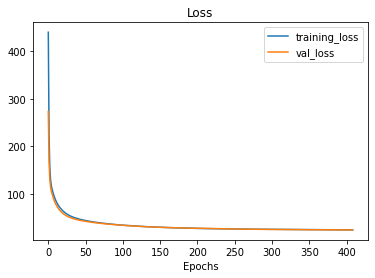

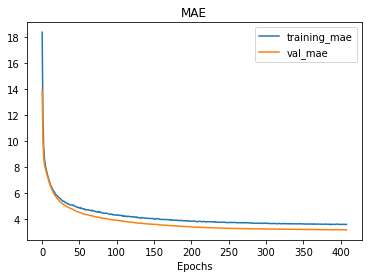

In [45]:
# Plot Loss and MAE curves of Linear Regression model
plot_loss_curves(history_1)

In [46]:
# Evaluation on test set
lin_predictions = linear_reg_model.predict(X_test_normalized)
print(f'MAE on test set: {mean_absolute_error(y_test, lin_predictions)}')
print(f'R2 score on test set: {r2_score(y_test, lin_predictions)}')

MAE on test set: 3.144311383191277
R2 score on test set: 0.6419593304705407


# Deep Neural Networks

In [47]:
# Set random seed
tf.random.set_seed(42)

# Creating a DNN using TF FunctionalAPI
inputs = Input(shape=(12,))
x = Dense(32, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

dnn_model = Model(inputs, outputs)

In [48]:
dnn_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_5 (Dense)             (None, 32)                416       
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                           

In [49]:
# Compile the model
dnn_model.compile(loss=tf.keras.losses.mse,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics='mae')

In [50]:
# Fit the model
history_2 = dnn_model.fit(X_train_normalized, y_train, epochs=1000, validation_data=(X_val_normalized, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(patience=6)])

Epoch 1/1000
10/10 [==============================] - 1s 24ms/step - loss: 616.3749 - mae: 22.7623 - val_loss: 595.2879 - val_mae: 22.7223
Epoch 2/1000
10/10 [==============================] - 0s 8ms/step - loss: 601.3703 - mae: 22.6870 - val_loss: 592.6839 - val_mae: 22.6911
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 586.2272 - mae: 22.5952 - val_loss: 589.7065 - val_mae: 22.6565
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 576.2771 - mae: 22.5028 - val_loss: 586.2084 - val_mae: 22.6099
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 568.5298 - mae: 22.4260 - val_loss: 581.7410 - val_mae: 22.5427
Epoch 6/1000
10/10 [==============================] - 0s 8ms/step - loss: 560.5830 - mae: 22.3672 - val_loss: 576.7527 - val_mae: 22.4657
Epoch 7/1000
10/10 [==============================] - 0s 8ms/step - loss: 550.2191 - mae: 22.2371 - val_loss: 570.6357 - val_mae: 22.3617
Epoch 8/1000
10/10 [=============

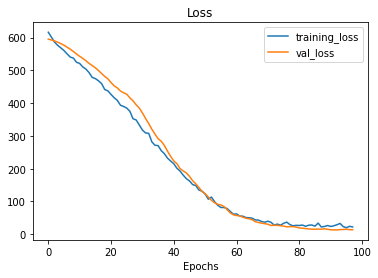

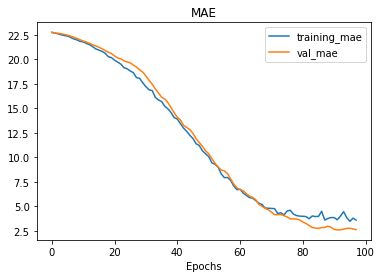

In [51]:
plot_loss_curves(history_2)

In [52]:
# Evaluation on test set
dnn_predictions = dnn_model.predict(X_test_normalized)
print(f'MAE on test set: {mean_absolute_error(y_test, dnn_predictions)}')
print(f'R2 score on test set: {r2_score(y_test, dnn_predictions)}')

MAE on test set: 2.1216829430823236
R2 score on test set: 0.8452447476015827


# Save the model

In [53]:
dnn_model.save('dnn.h5')